## 读取3D数据

In [1]:
import torch
import numpy as np

torch.set_printoptions(edgeitems=2, threshold=50)

In [2]:
import imageio.v3 as iio

In [3]:
dir_path = "../../myData/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"

> imageio.v2的API迁移文档：https://imageio.readthedocs.io/en/stable/reference/userapi.html#functions-for-reading

iio.imread()现在可以直接返回多维图像，格式为ndimage类，因此，v2中的iio.volread()已被合并到imread()中，并被移除了。
此外，imread()的默认行为也发生了变化。现在要么返回第一个存储的ndimage，要么根据格式来判断是否直接返回所有的图像更常见(合理)。

In [5]:
vol_arr = iio.imread(dir_path, "DICOM")

TypeError: imread() takes 1 positional argument but 2 were given

In [6]:
import imageio.v2 as iio2

vol_arr = iio2.volread(dir_path, "DICOM")

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 81/99  (81.899/99  (100.0%)


In [7]:
vol_arr.shape

(99, 512, 512)

In [8]:
vol = torch.from_numpy(vol_arr).to(torch.float)
vol.shape

torch.Size([99, 512, 512])

In [9]:
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 99, 512, 512])

In [17]:
import matplotlib.pyplot as plt

# plt.style.use("default")

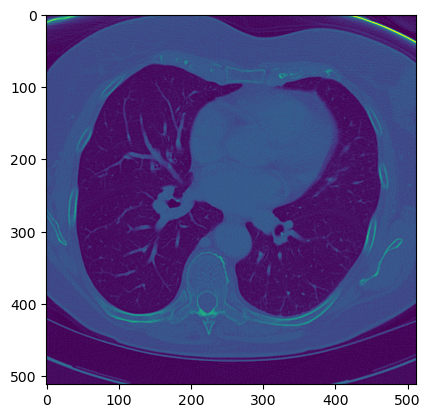

In [18]:
plt.imshow(vol_arr[50])
# 每一张图片都是一个横截面切片，这里显示的是第50张切片

可以在低两维索引来展示竖切面，索引第二维是面向正面的竖切面，索引第三维是侧面的竖切面。

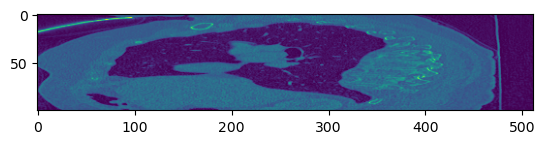

In [19]:
plt.imshow(vol_arr[:, :, 200])

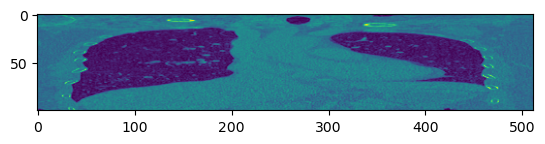

In [20]:
plt.imshow(vol_arr[:, 200, :])